In [309]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
sms_raw.columns = ['message', 'impressions']
sms_raw.head(10)

,message,impressions
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [311]:
keywords = ['great', 'excellent', 'recommend', 'awesome', 'easy', 'nice', 'clarity', 'must', 'best', 'pleased', 'prompt'
           'finally', 'clear', 'happier', 'comfortable', 'easier', 'beautiful', 'love', 'wow', 'joy', 'like', 'perfectly'
           'comfortably', 'glad', 'really good', 'quick', 'exactly', 'bargain', 'simple', 'worthwhile', 'user friendly',
           'works well', 'fabulous', 'impressed', 'ideal', 'well made', 'reasonable', 'sturdy', 'useful', 'happy', 'cool'
           'loves', 'super', 'seamlessly', 'good purchase', 'beautiful', 'sleek', 'winner', 'brilliant', 'peachy-keen',
           'tremendous', 'perfectly', 'significantly', 'superb', 'charm', 'incredible', 'helpful', 'light weight', 'incredibly',
           'reasonably', 'fast service', 'infatuated', 'lightweight', 'favorite', 'comfort', 'shine', 'durable', 'flawlessly', 
           'real good', '5 starts', 'works great', 'wise decision', 'really fast', 'slim', 'must have', 'no problem', 'no problems','low price', 
           'working well', 'nice', 'magical', 'exactly', 'excelent', 'fine', 'fantastic', 'right away', 'like new', 'on time',
           'work great', "won't regret", 'excels', 'rocks', 'satisfied', 'amazing', 'amazed', 'very good', 'excited',
           'thanks', 'good work', 'sleek', 'pretty good', 'total package', 'patient', 'everything', 'well', 'without effort',
           'comfortible', 'very well', 'long haul', 'any problem', 'smoothly', 'well made', 'pretty well', 'outperform',
           'whoa', "couldn't ask", 'classy', 'fantastic', 'pleasantly', 'convenient', 'crisp', 'generally', 'perfect',
           'thumbs up', 'quite long', 'so far', 'flawless', 'exceptional', 'saved alot', 'wonderfully', 'works good', '10',
           'lightly','really like', 'pretty']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [312]:
sms_raw['impressions'] = (sms_raw['impressions'] == 1)

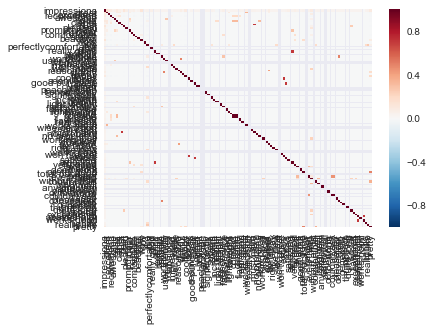

In [313]:
sns.heatmap(sms_raw.corr())

In [314]:
data = sms_raw[keywords]
target = sms_raw['impressions']# Our data is binary / boolean, so we're importing the Bernoulli classifier.


In [315]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
target_p = (target != y_pred).sum()
percent = (1000 - target_p) / 10
# Display our results.
print("Accuracy rate out of a total {} points : {}%".format(
    data.shape[0], percent))

Accuracy rate out of a total 1000 points : 70.0%
